<a href="https://colab.research.google.com/github/MihaelaCatan04/Sigmoid_Deep_Dive/blob/main/Lesson_1/Lesson_1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Nr.1
#### Tasks:
1. Complete week 3 and 4 of the first course from specialization;
2. Go step by step and try to remember and understand everything we did during the lesson;
3. Complete the practical Task

#### Practical Task:
Implement a logistic regression model using PyTorch to classify images from the MNIST dataset.
1. Implement all needed libraries
2. Load and display few images from the dataset
3. Train-test split
4. Create DataLoaders for each set
5. Create Neural Network Class
6. Create Training and Testing loop
7. Train your model
8. Test your model
9. Output your results (accuracy and prediction examples)
10. Draw conclusions


Good luck!

### Solution:

Import all the necessary dependencies:

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download tes data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Show an image of each class:

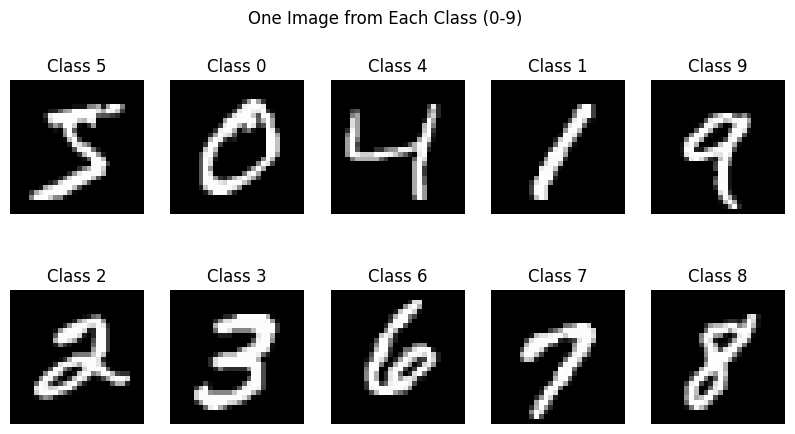

In [20]:
import matplotlib.pyplot as plt
class_images = {}

# Store all unique labels in class_images
for image, label in training_data:
    if label not in class_images:
        class_images[label] = image
    if len(class_images) == 10:
        break

# Plot an image of each class
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Dataset classes (0-9)")

for i, (label, image) in enumerate(class_images.items()):
    ax = axs[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(f"Class {label}")
    ax.axis("off")

plt.show()

Create the DataLoader:

In [5]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f"Shape of X: {X.shape}")
  print(f"Shape of y: {y.shape}")
  break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


Set the device to GPU if available:

In [6]:
device = (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.mps.is_available()
    else "cpu"
)

In [7]:
print(f"Your laptop is using {device}")

Your laptop is using cpu


Create a Neural Network that inherits from the LogisticRegressionModel:

In [8]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(28 * 28, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear(x)
    predictions = torch.sigmoid(x)
    return predictions

model = LogisticRegression().to(device)
print(model)

LogisticRegression(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [10]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch_no, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch_no % 100 == 0:
      loss, current = loss.item(), (batch_no + 1) * len(X)
      print(f"Loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [11]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
  print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
print(f"Unique target values in this batch: {y.unique()}")

Unique target values in this batch: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [13]:
epochs = 25
for epoch in range(epochs):
  print(f"Epoch {epoch+1}\n------------------------------")
  train(train_dataloader, model, loss_func, optimizer)
  test(test_dataloader, model, loss_func)
print("DONE!")

Epoch 1
------------------------------
Loss: 2.317191 [   64/60000]
Loss: 2.302024 [ 6464/60000]
Loss: 2.295447 [12864/60000]
Loss: 2.283239 [19264/60000]
Loss: 2.281717 [25664/60000]
Loss: 2.275386 [32064/60000]
Loss: 2.268034 [38464/60000]
Loss: 2.271561 [44864/60000]
Loss: 2.253877 [51264/60000]
Loss: 2.244089 [57664/60000]
Test error: 
 Accuracy: 35.6%, Avg loss: 2.248129 

Epoch 2
------------------------------
Loss: 2.255813 [   64/60000]
Loss: 2.239884 [ 6464/60000]
Loss: 2.245231 [12864/60000]
Loss: 2.212903 [19264/60000]
Loss: 2.223569 [25664/60000]
Loss: 2.220733 [32064/60000]
Loss: 2.207356 [38464/60000]
Loss: 2.224831 [44864/60000]
Loss: 2.198301 [51264/60000]
Loss: 2.190134 [57664/60000]
Test error: 
 Accuracy: 61.5%, Avg loss: 2.194090 

Epoch 3
------------------------------
Loss: 2.203139 [   64/60000]
Loss: 2.186151 [ 6464/60000]
Loss: 2.199389 [12864/60000]
Loss: 2.155960 [19264/60000]
Loss: 2.172438 [25664/60000]
Loss: 2.172502 [32064/60000]
Loss: 2.157079 [38464/600

In [14]:
import random

In [21]:
import random

classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

model.eval()
for i in range(20):
  index = random.randint(0, len(test_data) - 1)
  X, y = test_data[index]

  with torch.no_grad():
      X = X.to(device)
      pred = model(X)
      predicted, actual = classes[pred[0].argmax(0)], classes[y]
      print(f"Predicted: {predicted}, Actual: {actual} \n")


Predicted: 9, Actual: 9 

Predicted: 5, Actual: 5 

Predicted: 8, Actual: 2 

Predicted: 1, Actual: 1 

Predicted: 1, Actual: 1 

Predicted: 3, Actual: 3 

Predicted: 9, Actual: 4 

Predicted: 4, Actual: 4 

Predicted: 8, Actual: 8 

Predicted: 1, Actual: 1 

Predicted: 3, Actual: 3 

Predicted: 4, Actual: 4 

Predicted: 1, Actual: 7 

Predicted: 7, Actual: 7 

Predicted: 1, Actual: 1 

Predicted: 2, Actual: 2 

Predicted: 8, Actual: 8 

Predicted: 0, Actual: 0 

Predicted: 5, Actual: 5 

Predicted: 9, Actual: 4 



**Conclusion:**

In this notebook, I successfully implemented a logistic regression model using PyTorch to classify handwritten digits from the MNIST dataset. The project involved several key steps, including data loading, model definition, and training/testing loops. Through these steps, we built a foundational understanding of the logistic regression model and its application in image classification.

After training, the model was evaluated on test data to determine its accuracy. While logistic regression provides a good introduction to classification tasks, more complex models (such as deep neural networks) would likely yield better accuracy on the MNIST dataset. This exercise helped reinforce essential concepts in PyTorch and logistic regression, setting a strong foundation for more advanced deep learning models.